In [4]:
!ls

2023-Papers   anaconda3  nohup.out   pipeline  snap		   time
GeoProj       data.txt	 normal.csv  sd-web    stable-diffusion
abnormal.csv  datasets	 nvdiffrast  shap-e    stable-dreamfusion


In [5]:
import numpy
import pandas as pd

In [6]:
df = pd.read_excel("./datasets/SyncData.xlsx")

In [7]:
df

,time_H,Load_H,Res_H,Unnamed: 3,time_V,Load_V,Res_V,Unnamed: 7,time_R,Load_R,Res_R
0,0.000000,-50.492321,-29.348735,NaN,0.000000,-50.491787,-7.147780,NaN,0.000000,-50.492321,-18.590963
1,0.099999,-57.784882,-30.116238,NaN,0.099103,-57.416561,-7.211393,NaN,0.101004,-57.784882,-18.858859
2,0.199998,-65.520958,-30.642679,NaN,0.198207,-65.163918,-7.312418,NaN,0.202008,-65.520958,-19.064215
3,0.299998,-72.881187,-30.999211,NaN,0.297310,-72.527718,-7.399222,NaN,0.303012,-72.881187,-19.256227
4,0.399997,-79.665817,-31.263917,NaN,0.396413,-79.352386,-7.467273,NaN,0.404015,-79.665817,-19.407368
...,...,...,...,...,...,...,...,...,...,...,...
49994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5049.586555,-10.056506,-9.803270
49995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5049.687559,-15.210902,-10.015795
49996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5049.788562,-21.204048,-10.185714
49997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5049.889566,-27.932865,-10.322576


In [8]:
X = pd.concat([df.loc[:]["time_H"], df.loc[:]["Res_R"]], axis=1)

In [9]:
dataTrain = X[:39974]
dataTest = X[39974:49967]

In [10]:
dataTrain

,time_H,Res_R
0,0.000000,-18.590963
1,0.099999,-18.858859
2,0.199998,-19.064215
3,0.299998,-19.256227
4,0.399997,-19.407368
...,...,...
39969,3996.869506,-11.291845
39970,3996.969505,-11.278127
39971,3997.069505,-11.245393
39972,3997.169504,-11.203356


In [11]:
dataTest

,time_H,Res_R
39974,3997.369502,-11.079368
39975,3997.469501,-10.998246
39976,3997.569501,-10.914401
39977,3997.669500,-10.801342
39978,3997.769499,-10.667195
...,...,...
49962,4996.161882,-10.728813
49963,4996.261881,-10.788798
49964,4996.361880,-10.833265
49965,4996.461880,-10.865742


In [12]:
import matplotlib.pyplot as plt

In [13]:
dataTrain.iloc[:, 0]

0           0.000000
1           0.099999
2           0.199998
3           0.299998
4           0.399997
            ...     
39969    3996.869506
39970    3996.969505
39971    3997.069505
39972    3997.169504
39973    3997.269503
Name: time_H, Length: 39974, dtype: float64

In [14]:
dataTrain.iloc[:, 1]

0       -18.590963
1       -18.858859
2       -19.064215
3       -19.256227
4       -19.407368
           ...    
39969   -11.291845
39970   -11.278127
39971   -11.245393
39972   -11.203356
39973   -11.147275
Name: Res_R, Length: 39974, dtype: float64

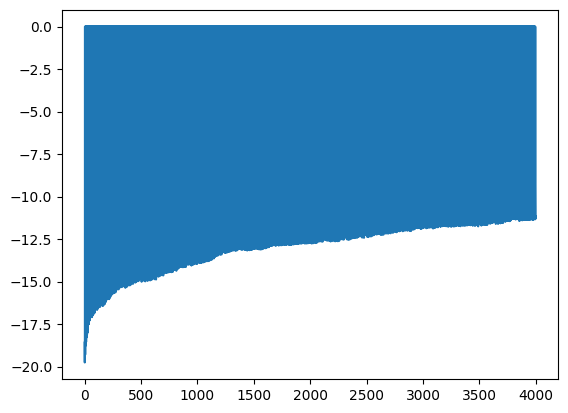

In [15]:
plt.plot(dataTrain.iloc[:, 0], dataTrain.iloc[:, 1])

In [16]:
XTrain = dataTrain[:len(dataTrain) - 1]
TTrain = dataTrain[1:len(dataTrain)]

XTest = dataTest[:len(dataTest) - 1]
TTest = dataTest[1:len(dataTest)]

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
std = StandardScaler()

In [19]:
std.fit(XTrain)
XTrain_scaled = std.transform(XTrain)
XTest_scaled = std.transform(XTest)

std.fit(TTrain)
TTrain_scaled = std.transform(TTrain)
TTest_scaled = std.transform(TTest)

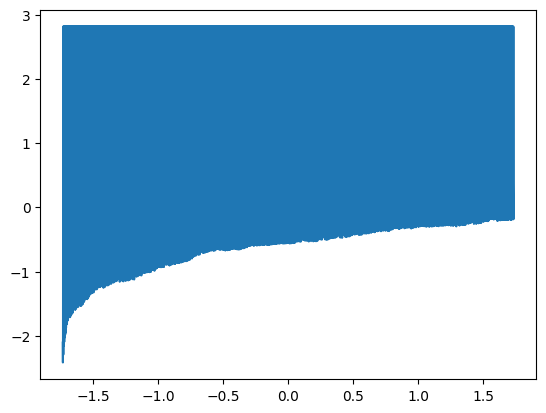

In [20]:
plt.plot(XTrain_scaled[:, 0], XTrain_scaled[:, 1])

In [45]:
XTrain_prev = pd.Series(XTrain_scaled[:, 1])
XTest_prev = pd.Series(XTest_scaled[:, 1], index=[i for i in range(len(XTrain_scaled), len(XTrain_scaled) + len(XTest_scaled))])

In [46]:
import pmdarima as pm

In [47]:
XTrain_scaled

array([[-1.73200748, -2.10771972],
       [-1.73192082, -2.17869372],
       [-1.73183416, -2.23309891],
       ...,
       [ 1.73183416, -0.17031896],
       [ 1.73192082, -0.16164676],
       [ 1.73200748, -0.15050972]])

In [48]:
# auto_arima_model = pm.auto_arima(XTrain_scaled[:, 1], seasonal=True, m=24)

In [49]:
# fcast = auto_arima_model.predict(len(XTest_scaled))
# fcast = pd.Series(fcast, index=[i for i in range(len(XTrain_scaled), len(XTrain_scaled) + len(XTest_scaled))])
# fcast2 = pd.Series([None] * len(XTrain_scaled))
# fcast_copy = pd.concat((fcast2, fcast), axis=0)

In [50]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [63]:
model = SARIMAX(XTrain_scaled[:, 1], order=(7, 0, 1), seasonal_order=(2, 2, 2, 24))

In [86]:
# from statsmodels.tsa.arima.model import ARIMA

In [293]:
# model = ARIMA(XTrain_scaled[:, 1], order=(7, 0, 2))

In [64]:
model_fit = model.fit()

/root/anaconda3/envs/papers/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/root/anaconda3/envs/papers/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.96123D-01    |proj g|=  1.79203D+00


 This problem is unconstrained.



At iterate    5    f= -2.62054D-01    |proj g|=  3.27412D-01

At iterate   10    f= -5.85556D-01    |proj g|=  1.62794D-01

At iterate   15    f= -6.16940D-01    |proj g|=  5.03535D-02

At iterate   20    f= -6.41973D-01    |proj g|=  5.28663D-02

At iterate   25    f= -6.50635D-01    |proj g|=  2.24391D-02

At iterate   30    f= -6.51792D-01    |proj g|=  8.23561D-02

At iterate   35    f= -6.53657D-01    |proj g|=  8.14935D-02

At iterate   40    f= -6.54472D-01    |proj g|=  8.82401D-02

At iterate   45    f= -6.54971D-01    |proj g|=  2.13266D-02


/root/anaconda3/envs/papers/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -6.55574D-01    |proj g|=  1.41681D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     65      1     0     0   1.417D-02  -6.556D-01
  F = -0.65557412067569920     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


: 

: 

In [1]:
len(XTest_scaled)

NameError: name 'XTest_scaled' is not defined

In [54]:
fpred = model_fit.predict(start=0, end=len(XTrain_scaled))

In [55]:
fpred = pd.Series(fpred)

<Axes: >

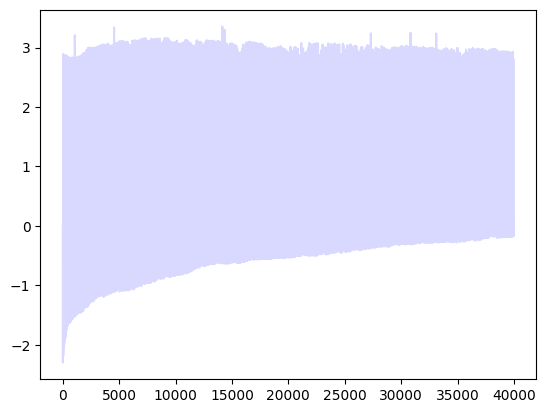

In [56]:
fpred.plot(color="blue", alpha=0.15)

In [57]:
fcast = model_fit.predict(start=len(XTrain_scaled) - 10000, end=len(XTrain_scaled) + len(XTest_scaled) - 1)

In [58]:
fcast = pd.Series(fcast)

<Axes: >

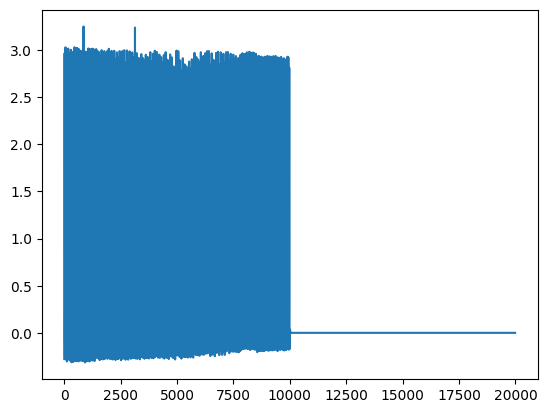

In [59]:
fcast.plot()

In [60]:
fcast = model_fit.forecast(len(XTest_scaled))

In [61]:
# fcast = pd.Series(fcast, index=[i for i in range(len(XTrain_scaled), len(XTrain_scaled) + len(XTest_scaled))])
fcast = pd.Series(fcast)
fcast2 = pd.Series([None] * len(XTrain_scaled))
fcast_copy = pd.concat((fcast2, fcast), axis=0)

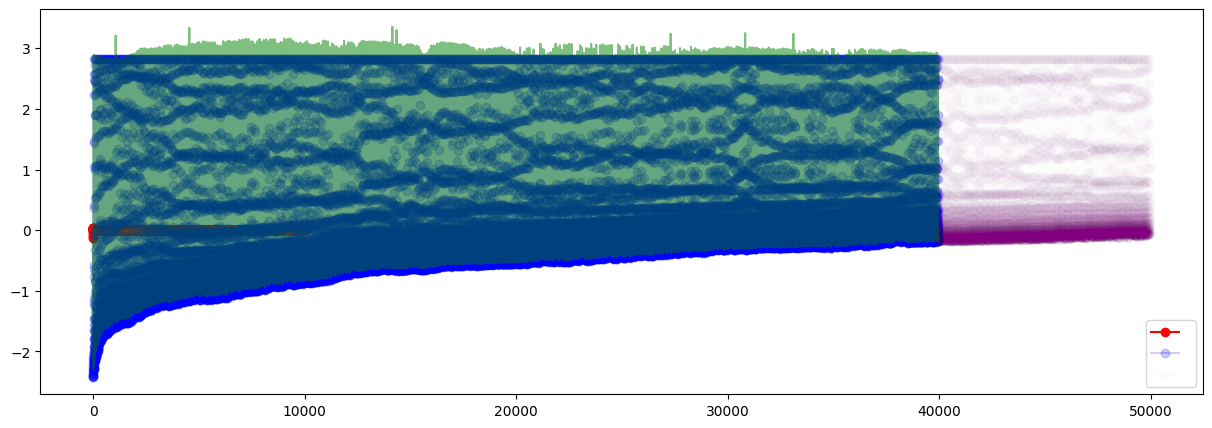

In [62]:
fig, ax = plt.subplots(figsize=(15, 5))
fcast_copy.plot(ax=ax, color="red", marker="o", legend=True)
XTrain_prev.plot(ax=ax, color="blue", marker="o", alpha=0.2, legend=True)
XTest_prev.plot(ax=ax, color="purple", marker="o", alpha=0.01, legend=True)
plt.plot(model_fit.fittedvalues, color="green", alpha=0.5)

In [209]:
fcast = model_fit.predict()

In [210]:
len(XTest_scaled)

9992

In [211]:
len(fcast)

39973

In [212]:
# fcast = pd.Series(fcast, index=[i for i in range(len(XTrain_scaled), len(XTrain_scaled) + len(XTest_scaled))])
fcast = pd.Series(fcast)
fcast2 = pd.Series([None] * len(XTrain_scaled))
fcast_copy = pd.concat((fcast2, fcast), axis=0)

In [213]:
len(XTrain_scaled)

39973

In [214]:
fcast2

0        None
1        None
2        None
3        None
4        None
         ... 
39968    None
39969    None
39970    None
39971    None
39972    None
Length: 39973, dtype: object

In [216]:
fcast_copy

0            None
1            None
2            None
3            None
4            None
           ...   
39968   -0.181963
39969   -0.164421
39970   -0.171809
39971   -0.158889
39972   -0.154399
Length: 79946, dtype: object

<Axes: >

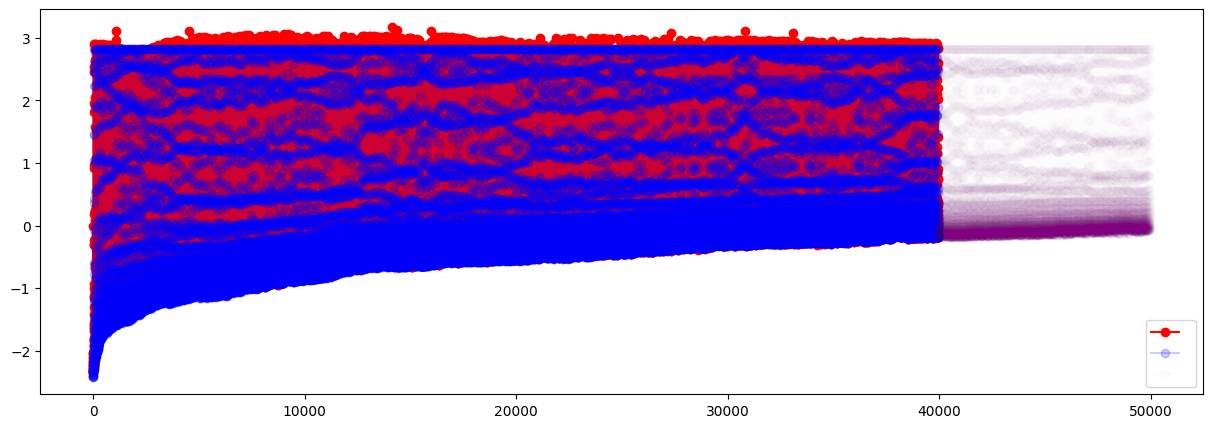

In [217]:
fig, ax = plt.subplots(figsize=(15, 5))
fcast_copy.plot(ax=ax, color="red", marker="o", legend=True)
XTrain_prev.plot(ax=ax, color="blue", marker="o", alpha=0.2, legend=True)
XTest_prev.plot(ax=ax, color="purple", marker="o", alpha=0.01, legend=True)